In [1]:
import requests
import re
from collections import OrderedDict
from itertools import repeat
from tqdm import tqdm_notebook
import pandas as pd
import lxml.html
from selenium.webdriver import Chrome

In [2]:
poetry = pd.read_csv('poetry.csv')

In [3]:
author = pd.read_csv('poetry_author.csv')

In [4]:
poetry['writer'] = poetry.writer.apply(lambda x: 'poemlove' if x=='none' else x)

In [5]:
author = author[52:-25]
author = author.reset_index(drop = True)

In [6]:
poetry = poetry.drop_duplicates(['url'],keep='first').reset_index(drop = True)

In [57]:
poetry_final = pd.concat([poetry,author],axis=1)
poetry_final = poetry_final.iloc[:,[0,1,2,3,5]]

In [58]:
poetry_final = poetry_final.drop_duplicates(['contents'],keep='first').reset_index(drop = True)
len(poetry_final)

143736

In [59]:
poetry_final[poetry_final.author.isnull() == True]

,url,title,writer,contents,author
2053,http://poemlove.co.kr/m/bbs/board.php?bo_table...,특집/셸리 탄생 200주년 기념 특집 - 셸리(Percy Bysshe Shelly)...,poemlove,"['‘시문학’ 지 <NUM>년 7월호:', '특집/셸리 탄생 <NUM>주년 기념 특...",NaN
12266,http://poemlove.co.kr/m/bbs/board.php?bo_table...,대작(對酌),김안로,"['대작<CHI>/김안로', '나는 막걸리를 들고', '하늘은 구름을 들이켰지', ...",NaN
15614,http://poemlove.co.kr/m/bbs/board.php?bo_table...,"해운대 찬가(海雲臺, 讚歌)/李時明",이시명,"['해운대 찬가<CHI>, <CHI>', '/李<CHI>', '국유 현묘지도와 ""천...",NaN
18130,http://poemlove.co.kr/m/bbs/board.php?bo_table...,겨울 그리고 봄,송정숙,"['겨울 그리고 봄', '-송정숙-', '밑그림을 그린다', '너를 위해서', '꽃...",NaN
18132,http://poemlove.co.kr/m/bbs/board.php?bo_table...,창 밖에는 눈3,송정숙,"['창 밖에는 눈3', '-송정숙-', '오전에는 봄', '오후에는 겨울 눈', '...",NaN
18133,http://poemlove.co.kr/m/bbs/board.php?bo_table...,창 밖에는 눈2,송정숙,"['창 밖에는 눈2', '어찌하나요', '떠난다고 하는데', '이렇게 웃죠', '마...",NaN
18134,http://poemlove.co.kr/m/bbs/board.php?bo_table...,창 밖에는 눈1,송정숙,"['창 밖에는 눈1', '-송정숙-', '햇살 뒷 걸음', '마지막 꽃이 되자', ...",NaN
18199,http://poemlove.co.kr/m/bbs/board.php?bo_table...,구름에 숨은 달,송정숙,"['구름에 숨은 달', '-송정숙-', '직무유기다', '법원서 출두하래', '보름...",NaN
18200,http://poemlove.co.kr/m/bbs/board.php?bo_table...,빨간 신호등으로 멈추지 못 한다,송정숙,"['빨간 신호등으로 멈추지 못 한다', '-송정숙-', '날개가 있어야', '날아 ...",NaN
18201,http://poemlove.co.kr/m/bbs/board.php?bo_table...,그믐달,송정숙,"['그믐달', '-송정숙-', '주고 또 준다', '마지막은 자존심', '지키게 해...",NaN


In [60]:
poetry_final.isnull().sum()

url           0
title        13
writer        0
contents      1
author      111
dtype: int64

In [61]:
poetry_final = poetry_final[poetry_final.title.isnull() == False].reset_index(drop = True)
poetry_final = poetry_final[poetry_final.contents.isnull() == False].reset_index(drop = True)
poetry_final = poetry_final[poetry_final.author.isnull() == False].reset_index(drop = True)

In [62]:
poetry_final['title'] = poetry_final.title.apply(lambda x: x.split(' - '))

In [63]:
poetry_final['title']

0                            [동시/첫눈 오는 날.]
1                                [그리움, 너는]
2                         [비워내는 건 외로운 법이다]
3                       [지극히 따뜻한 애혼(愛魂)에게]
4         [12월엔  설화(雪花)를 그리는 한 마리 노루이고 싶다]
                        ...               
143606                         [가죽나무, 도종환]
143607                       [당신의 나라, 서주홍]
143608                       [물먹는 하마, 강문숙]
143609             [혼자 일 수 밖에 없었던 이유, 이용채]
143610                          [한사람, 이정하]
Name: title, Length: 143611, dtype: object

In [64]:
a = []
for i in range(len(poetry_final.title)):
    if len(poetry_final.title[i]) > 2:
        a.append(i)

In [65]:
len(a)

453

In [66]:
poetry_final = poetry_final.drop(a,0).reset_index(drop = True)

In [67]:
poetry_final.isnull().sum()

url         0
title       0
writer      0
contents    0
author      0
dtype: int64

In [68]:
b = []
for i in range(len(poetry_final.title)):
    if len(poetry_final.title[i]) == 2:
        b.append([poetry_final.title[i][0]])
    else:
        b.append(poetry_final.title[i])

In [69]:
len(b)

143158

In [70]:
poetry_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143158 entries, 0 to 143157
Data columns (total 5 columns):
url         143158 non-null object
title       143158 non-null object
writer      143158 non-null object
contents    143158 non-null object
author      143158 non-null object
dtypes: object(5)
memory usage: 5.5+ MB


In [71]:
poetry_final['title'] = b

In [72]:
poetry_final

,url,title,writer,contents,author
0,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[동시/첫눈 오는 날.],장수남,"['동시/첫눈 오는 날.', '은빛하늘 하얀 꿈', '하얀 둥지 틀고', '아장아장...",장수남
1,http://poemlove.co.kr/m/bbs/board.php?bo_table...,"[그리움, 너는]",고은영,"['그리움, 너는 / <CHI>고은영', '비 오는 저 들녘', '눈 내리는 어둑한...",고은영
2,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[비워내는 건 외로운 법이다],고은영,"['비워내는 건 외로운 법이다 / <CHI>고은영', '깊은 겨울 추위 속에도 창가...",고은영
3,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[지극히 따뜻한 애혼(愛魂)에게],고은영,"['지극히 따뜻한 애혼<CHI>에게 / <CHI>고은영', '너의 영혼에 나를 심고...",고은영
4,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[12월엔 설화(雪花)를 그리는 한 마리 노루이고 싶다],고은영,['<NUM>월엔 설화<CHI>를 그리는 한 마리 노루이고 싶다 / <CHI>고은영...,고은영
5,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[감잎을 쓸어 모으며],김동기,"['감잎을 쓸어 모으며', '가을이란 이름으로', '이 땅에 내려와 나뒹굴던', '...",김동기
6,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[겨울행 열차],임영준,"['겨울행 열차', '과연', '우리 중에 누가', '홀가분한 왕복표를', '끊을 ...",임영준
7,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[착각],이남일,"['착각', '이남일', '나는 나를 볼 수 없고', '너는 너를 볼 수 없다.',...",이남일
8,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[시인에게],이문자,"['아름다운 바보', '동시사랑 이문자', '세상 모든', '아픔과 슬픔까지도',...",이문자
9,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[수선화],이문자,"['수선화', '동시사랑 이문자', '수선이 뾰족히', '솟아 나왔네', '올 해...",이문자


In [73]:
poetry_final.contents[0]

"['동시/첫눈 오는 날.', '은빛하늘 하얀 꿈', '하얀 둥지 틀고', '아장아장 작은 설렘', '첫눈이 내린다.', '소복소복 너와의', '속삭임은', '초롱불 외할머니의', '긴 옛이야기.', '앞마당 눈사람', '콧수염 우리할아버지', '내가 그리 생겼냐?', '추억하나 그립다.']"

In [74]:
b = []
for content in tqdm_notebook(poetry_final.contents):
    a = []
    for i in range(len(content.split("'")[1:-1])):
        if i % 2 == 0:
            a.append(content.split("'")[1:-1][i])
    b.append(a)
poetry_final['contents'] = b

In [75]:
poetry_final.title[7][0]

'착각'

In [76]:
poetry_final['contents'][7][:2]

['착각', '이남일']

In [77]:
'ssdfa' in 'ssdfaerew'

True

In [78]:
for i in poetry_final['contents'][7][:2]:
    if poetry_final.title[7][0] in i:
        print('d')

d


In [79]:
poetry_final['contents'][0][:2][1]

'은빛하늘 하얀 꿈'

In [80]:
poetry_final['title'][56]

['초겨울 날 아침']

In [81]:
poetry_final['contents'][138000]

['황혼이 바다가 되어 윤동주하로도 검푸른 물결에흐느적 잠기고......잠기고......저--왼 검은 고기 떼가물든 바다를 날아 횡단할고.낙엽이 된 해초해초마다 슬프기도 하오.서창에 걸린 해말간 풍경화.옷고름 너어는 고아<CHI>의 서름.이제 첫 항해하는 마음을 먹고방바닥에 나뒹구오......뒹구오......황혼이 바다가 되어오늘도 수많은 배가나와 함께 이 물결에 잠겼을 게오.']

In [82]:
len_con = []
for i in poetry_final['contents']:
    len_con.append(len(i))

In [83]:
len_con_df = pd.DataFrame(len_con)
len_con_df.describe()

,0
count,143158.000000
mean,16.472750
std,22.840872
min,0.000000
25%,8.000000
50%,16.000000
75%,22.000000
max,2712.000000


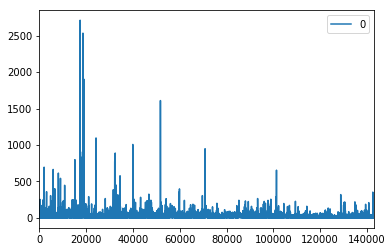

In [84]:
len_con_df.plot()

In [85]:
poetry_final.loc[len_con_df[0] == 1, 'contents']

71                                                     [**]
614                                         [수홍이한테 문자 보낸다.]
1054                                              [첨부파일 참조]
1124                                        [첨부파일 참조 바랍니다.]
2019      [내 사랑 그대여! 내 눈을 감겨요. 나 그대 만질 수 있어니;내 사랑 그대여 <N...
                                ...                        
143153    [나는 내가 부족한 나무라는 걸 안다 내딴에는 곧게 자란다 생각했지만 어떤 나무는 ...
143154    [언제나 당신은 저만치에만 있습니다 내가 다가갈 수 없는 꼭 그만치에 서서 나를 지...
143155    [어서, 하마를 치워야 할텐데 저 하마를 밖으로 끌어내야 할텐데 늦장마 끝나고 서늘...
143156    [돌아보면 언제나 혼자였다.나를 사랑한다고 다가오는 사람에게선내가 물러났고,내가 사...
143157    [살아가면서 많은 것이 묻혀지고 잊혀진다 하더라도 그대 이름만은 내 가슴에 남아 있...
Name: contents, Length: 26573, dtype: object

In [44]:
poetry_final.to_csv('poetry_final.csv',encoding='UTF8',index = False)

In [86]:
new_contents = []
for i in tqdm_notebook(range(len(poetry_final['contents']))):
    a = []
    try:
        for j in range(len(poetry_final['contents'][i][:2])):
            if poetry_final.title[i][0] in poetry_final['contents'][i][:2][j]:
                poetry_final['contents'][i].remove(poetry_final['contents'][i][:2][j])
            if poetry_final.author[i][0] in poetry_final['contents'][i][:2][j]:
                poetry_final['contents'][i].remove(poetry_final['contents'][i][:2][j])
    except:
        poetry_final['contents'][i]
            

In [89]:
poetry_final['contents'][0]

['은빛하늘 하얀 꿈',
 '하얀 둥지 틀고',
 '아장아장 작은 설렘',
 '첫눈이 내린다.',
 '소복소복 너와의',
 '속삭임은',
 '초롱불 외할머니의',
 '긴 옛이야기.',
 '앞마당 눈사람',
 '콧수염 우리할아버지',
 '내가 그리 생겼냐?',
 '추억하나 그립다.']

In [90]:
poetry_final

,url,title,writer,contents,author
0,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[동시/첫눈 오는 날.],장수남,"[은빛하늘 하얀 꿈, 하얀 둥지 틀고, 아장아장 작은 설렘, 첫눈이 내린다., 소복...",장수남
1,http://poemlove.co.kr/m/bbs/board.php?bo_table...,"[그리움, 너는]",고은영,"[비 오는 저 들녘, 눈 내리는 어둑한 골목, 바람부는 환장할 공터, 펄럭이는 깃발...",고은영
2,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[비워내는 건 외로운 법이다],고은영,"[깊은 겨울 추위 속에도 창가에서면, 이 따뜻한 햇살 안에 어둠처럼 웅크린, 주기적...",고은영
3,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[지극히 따뜻한 애혼(愛魂)에게],고은영,"[너의 영혼에 나를 심고 싶었다, 필연적으로 기우는 벼랑에서도, 너를 목말라하였기에...",고은영
4,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[12월엔 설화(雪花)를 그리는 한 마리 노루이고 싶다],고은영,"[미시령 깊은 계곡, 어느 이름 모를 골짜기로 들어가, 존재의 고독을 잊고, 아름아...",고은영
5,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[감잎을 쓸어 모으며],김동기,"[가을이란 이름으로, 이 땅에 내려와 나뒹굴던, <CHI>빛 짠한 낙엽의 상처를 보...",김동기
6,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[겨울행 열차],임영준,"[과연, 우리 중에 누가, 홀가분한 왕복표를, 끊을 수 있을까, 돌아오지 못할 가을...",임영준
7,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[착각],이남일,"[나는 나를 볼 수 없고, 너는 너를 볼 수 없다., 언제나 마주 보아야, 볼 수 ...",이남일
8,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[시인에게],이문자,"[아름다운 바보, 세상 모든, 아픔과 슬픔까지도, 아름답다 감싸는, 당신은 바보입니...",이문자
9,http://poemlove.co.kr/m/bbs/board.php?bo_table...,[수선화],이문자,"[수선이 뾰족히, 솟아 나왔네, 올 해도 어김없이, 내 뜰을 찾아 왔네, 겨우내 메...",이문자


In [91]:
poetry_final = pd.read_csv('poetry_final.csv')

In [95]:
poetry_final.contents[0][0]

'['